# Krönig-Penney Model with rectangular potential barriers

In [1]:
import numpy as np
import scipy as sc
from scipy import special
import matplotlib.pyplot as plt

# Analytical: $T_N(E)$ vs E relation for $E=k^2$ dispersion

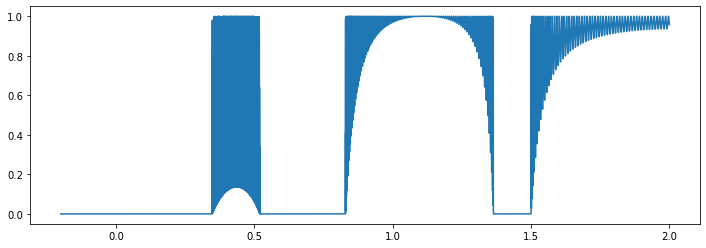

In [11]:
"""
The well-barirer system. 
To get the barrier-well system, just reverse the sign of the amplitude of the periodic potential.
"""

a = 4 # Well width
b = 4 # Barrier width
V0 = 0.50001 # Amplitude of the periodic potential
NU = 100 # Order of Chebyshev Polynomial
NE = 100000
E = np.linspace(-0.2,2,NE)

k1 = np.zeros(len(E),complex)
k2 = np.zeros(len(E),complex)

for i in range(len(E)):
    kk1 = E[i]+V0
    if kk1 <= 0:
        k1[i] = -1j*np.sqrt(abs(kk1))    
    else:
        k1[i] = np.sqrt(kk1)
    #print(k1)
    #plt.plot(k1)

for i in range(len(E)):
    kk2 = E[i]-V0
    if kk2 <= 0:
        k2[i] = np.sqrt(abs(kk2))
    else:
        k2[i] = -1j*np.sqrt(kk2)
    #print(k2)
    #plt.plot(k2)

M12=-1j*(k1**2+k2**2)/(2*k1*k2)*np.sinh(k2*b)
d=2*np.cosh(k2*b)*np.cos(k1*a)-(k1**2-k2**2)/(k1*k2)*np.sinh(k2*b)*np.sin(k1*a)

TN=np.zeros(len(E))

for i in range(len(E)):
    if np.abs(d[i])<2:
        theta=np.arccos(d[i]/2)
        UN_1=np.sin(NU*theta)/np.sin(theta) # Nth Chebyshev polynomial
        #UN_1=special.eval_chebyu(NU+1,theta)
        TN[i]=np.real((1/(1+(np.abs(M12[i])*UN_1)**2)))
    else:
        phi=np.arccosh(d[i]/2)
        UN_1=np.sinh(NU*phi)/np.sinh(phi)
        #UN_1=special.eval_chebyu(NU,phi)
        TN[i]=np.real((1/(1+(np.abs(M12[i])*UN_1)**2)))

#np.savetxt('data/bar_1D_ana_normal_KP_cond_a={0}_b={1}_V0={2:.3f}_NU={3}_NE={4}.txt'.format(a, b, V0, NU, NE),[E,TN],fmt='%.18e')

plt.figure(figsize=(12,4))
plt.plot(E,TN)

# TB: $T_N(E)$ vs E relation for $E \approx 2*(1-\cos k)$ dispersion

CPU times: total: 1.31 s
Wall time: 1.31 s


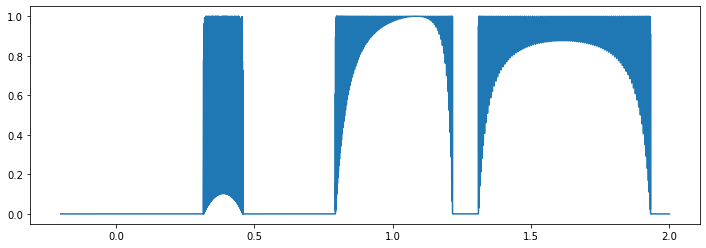

In [20]:
%%time
a=4 # Well width
b=4 # Barrier width
V0=0.50001

NU=100
NE=100000

E=np.linspace(-0.2, 2.0, NE)

# Start with well
if V0 > 0:
    k1 = np.arccos(1-(E+V0)/2 + 1e-16j) # Momenta in the well
    k2 = 1j*np.arccos(1 - (E-V0)/2 + 1e-16j) # Momenta on the barrier

# Start with barrier
if V0 < 0:
    k1 = np.arccos(1 - (E+V0)/2 + 1e-16j) 
    k2 = 1j*np.arccos(1 - (E-V0)/2 + 1e-16j)

M12=-1j*(k1**2+k2**2)/(2*k1*k2)*np.sinh(k2*b)
d=2*np.cosh(k2*b)*np.cos(k1*a)-(k1**2-k2**2)/(k1*k2)*np.sinh(k2*b)*np.sin(k1*a)

TN=np.zeros(len(E))
for i in range(len(E)):
    if np.abs(d[i])<2:
        theta=np.arccos(d[i]/2)
        UN_1=np.sin(NU*theta)/np.sin(theta) # Nth Chebyshev polynomial
        #UN_1=special.eval_chebyu(NU+1,theta)
        TN[i]=np.real((1/(1+(np.abs(M12[i])*UN_1)**2)))
    else:
        phi=np.arccosh(d[i]/2)
        UN_1=np.sinh(NU*phi)/np.sinh(phi)
        #UN_1=special.eval_chebyu(NU,phi)
        TN[i]=np.real((1/(1+(np.abs(M12[i])*UN_1)**2)))

        
#np.savetxt('data/bar_1D_TB_normal_KP_cond_a={0}_b={1}_V0={2:.3f}_NU={3}_NE={4}.txt'.format(a, b, V0, NU, NE),[E,TN],fmt='%.18e')

plt.figure(figsize=(12,4))
#plt.ylim(0.3,1.5)
plt.plot(E,TN)
#X,Y=np.loadtxt('data/bar_1D_TB_normal_KP_cond_a={0}_b={1}_V0={2:.3f}_NU={3}_NE={4}.txt'.format(a, b, V0, NU, NE))
#plt.plot(X,Y)
#plt.savefig('fig_2.png')

In [44]:
k2

array([4.43568254e-01+2.18217890e-16j, 2.97049064e-01+3.31744401e-16j,
       6.72691583e-16+1.49209574e-01j, 2.78543007e-16+3.67208021e-01j,
       2.08738623e-16+4.99592661e-01j, 1.75695482e-16+6.05491903e-01j,
       1.55752239e-16+6.97163134e-01j, 1.42231397e-16+7.79719029e-01j,
       1.32424557e-16+8.55878249e-01j, 1.25000000e-16+9.27295218e-01j])

## TB: $T_N(E)$ vs E relation for $E \approx \sin^2 k = 4 \sin^2 \frac{k}{2} \cos^2 \frac{k}{2}$ dispersion

<timed exec>:25: RuntimeWarning: overflow encountered in cdouble_scalars


CPU times: total: 1.3 s
Wall time: 1.31 s


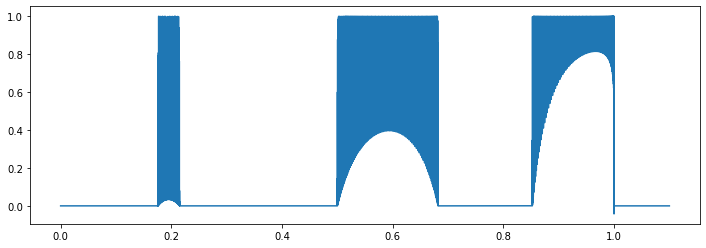

In [12]:
%%time
a=4 # Well width
b=4 # Barrier width
V0=0.50000001
NU=100
NE=100000
E=np.linspace(1e-6,1.1,NE)

k1=np.arcsin(np.sqrt(E+0j))
k2=np.arcsin(1j*np.sqrt(E-V0+0j))

M12=-1j*(k1**2+k2**2)/(2*k1*k2)*np.sinh(k2*b)
d=2*np.cosh(k2*b)*np.cos(k1*a)-(k1**2-k2**2)/(k1*k2)*np.sinh(k2*b)*np.sin(k1*a)

TN=np.zeros(len(E))
for i in range(len(E)):
    if np.abs(d[i])<2:
        theta=np.arccos(d[i]/2)
        UN_1=np.sin(NU*theta)/np.sin(theta) # Nth Chebyshev polynomial
        #UN_1=special.eval_chebyu(NU+1,theta)
        TN[i]=np.real((1/(1+(np.abs(M12[i])*UN_1)**2)))
    else:
        phi=np.arccosh(d[i]/2)
        UN_1=np.sinh(NU*phi)/np.sinh(phi)
        #UN_1=special.eval_chebyu(NU,phi)
        TN[i]=np.real((1/(1+(np.abs(M12[i])*UN_1)**2)))


plt.figure(figsize=(12,4))
#plt.ylim(0.3,1.5)
plt.plot(E,TN)